In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import array

In [101]:
data = pd.read_csv('ex2data1.txt', names=['Exam 1', 'Exam 2', 'Accepted'])
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


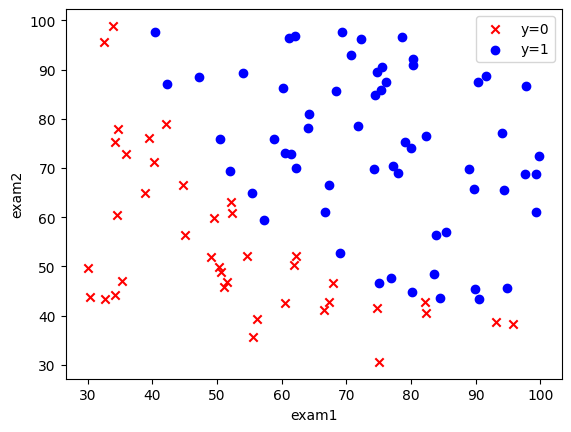

In [102]:
#数据可视化
fig, ax = plt.subplots()  #用于创建一个图形（fig）和一个坐标轴（ax）

#接收的为一类，未被接收的为一类
ax.scatter(data[data['Accepted'] == 0]['Exam 1'], data[data['Accepted'] == 0]['Exam 2'], color='red', marker='x',
           label='y=0')  #未被接收

ax.scatter(data[data['Accepted'] == 1]['Exam 1'], data[data['Accepted'] == 1]['Exam 2'], color='blue', marker='o',
           label='y=1')  #接收
ax.legend()
ax.set(xlabel='exam1', ylabel='exam2')
plt.show()


In [103]:
#将之前作业完成准备工作构造出一个数据集
def get_Xy(data):
    data.insert(0, 'ones', 1)
    X_ = data.iloc[:, 0: -1]
    y_ = data.iloc[:, -1]
    X = X_.values
    y = y_.values.reshape(len(y_), 1)
    return X, y

In [104]:
X, y = get_Xy(data)

In [105]:
X.shape

(100, 3)

In [106]:
y.shape

(100, 1)

In [107]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [108]:
def costFunction(X, y, theta):
    A = sigmoid(X @ theta)
    first = y * np.log(A)
    second = (1 - y) * np.log(1 - A)
    return -np.sum(first + second) / len(X)  #注意：first和second是向量，要做累积，所有使用sum函数进行求和

In [109]:
theta = np.zeros((3, 1))
theta.shape

(3, 1)

In [110]:
cost_init = costFunction(X, y, theta)
print(cost_init)

0.6931471805599453


In [111]:
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    costs = []
    for i in range(iters):
        A = sigmoid(X @ theta)
        theta = theta - (alpha / m) * (X.T @ (A - y))
        cost = costFunction(X, y, theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(cost)
    return theta, cost

In [112]:
alpha = 0.004
iters = 200000

In [113]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)

1.9886538578930086
3.0781700198641544
5.487009635362496
1.851943366133264
2.9551289424083573
5.438688730769618
1.8046128090728502
2.8312715776074047
5.3886531633606145
1.7561538117121556
2.706676380747814
5.3365673644957425
1.706280704769481
2.5818508519054277
5.281774101800353
1.6544129958512037
2.4578430947435765
5.223255119969365
1.5996612097145546
2.3362477519414626
5.159653459570274
1.5408871901849082
2.219049203846889
5.089387088751128
1.4768567851081464
2.1082685090536497
5.010845104587983
1.406449363280585
2.0054338903832694
4.9225734611717336
1.3288041261254435
1.9109646054893665
4.823257484826611
1.2432202250971685
1.8235866121521394
4.711246821296763
1.148627793213957
1.7397667362448002
4.58325740045735
1.0423478306006686
1.6525865746034043
4.430932868329269
0.9166267386002204
1.5465331276550867
4.224624720512682
0.7330944584991166
4.01632549891199
0.7559527960324565
0.5966969666560346
1.6862262743312635
0.4149967702248092
1.92207863313351
0.5662012970472322
2.46239219664654

In [114]:
theta_final

array([[-23.77618089],
       [  0.18693388],
       [  0.18049979]])

In [115]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return [1 if x >= 0.5 else 0 for x in prob]

In [116]:
y_ = np.array(predict(X, theta_final))
y_pre = y_.reshape(len(y_), 1)
acc = np.mean(y_pre == y)  #np.mean 函数计算这些1和0的平均值，即模型预测正确的比例。
print(acc)

0.86


In [117]:
#决策边界的显示
coef1 = -theta_final[0, 0] / theta_final[2, 0]
coef2 = -theta_final[1, 0] / theta_final[2, 0]

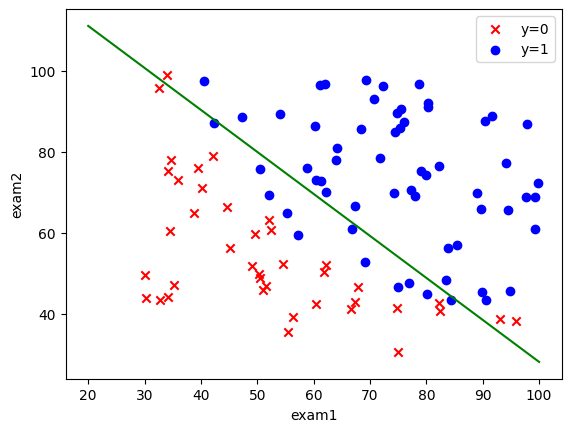

In [118]:
x = np.linspace(20, 100, 100)
f = coef1 + coef2 * x

fig, ax = plt.subplots()
ax.scatter(data[data['Accepted'] == 0]['Exam 1'], data[data['Accepted'] == 0]['Exam 2'], color='red', marker='x',
           label='y=0')  #未被接收
ax.scatter(data[data['Accepted'] == 1]['Exam 1'], data[data['Accepted'] == 1]['Exam 2'], color='blue', marker='o',
           label='y=1')  #接收
ax.plot(x, f, color='green')
ax.legend()
ax.set(xlabel='exam1', ylabel='exam2')
plt.show()